In [1]:
! pip install azure-ai-inference

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [7]:
df=pd.read_csv("tourism_dataset.csv")

In [8]:
df

Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3                        Yes  
4                         No  
...                      ...  
5984                      No  
5985                     Yes  
5986                      No  
5987                     Yes  
5988                     Yes  

[5989 rows x 7 columns]

In [9]:
df.shape

(5989, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB


In [12]:
df.describe()

Visitors       Rating        Revenue
count    5989.000000  5989.000000    5989.000000
mean   501016.089497     3.009347  499479.367253
std    289783.294978     1.155980  286743.225211
min      1108.000000     1.000000    1025.810000
25%    252789.000000     2.010000  251410.450000
50%    500831.000000     3.000000  494169.350000
75%    751371.000000     4.010000  742241.240000
max    999982.000000     5.000000  999999.490000

In [13]:
df.isna().sum()

Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

Location                   5989
Country                       7
Category                      6
Visitors                   5969
Rating                      401
Revenue                    5989
Accommodation_Available       2
dtype: int64

<Axes: xlabel='Country', ylabel='Count'>

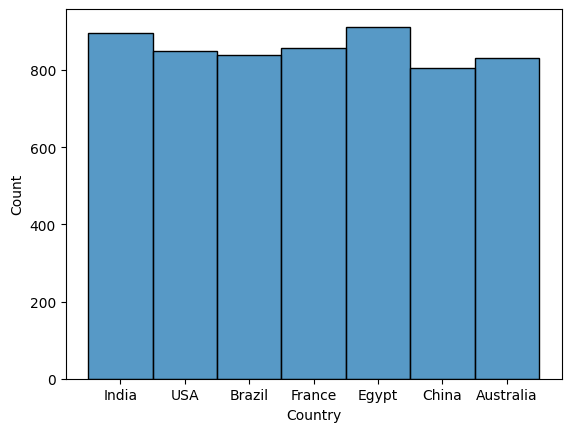

In [16]:
sns.histplot(data = df, x = 'Country', binwidth=1)

<Axes: xlabel='Category', ylabel='Count'>

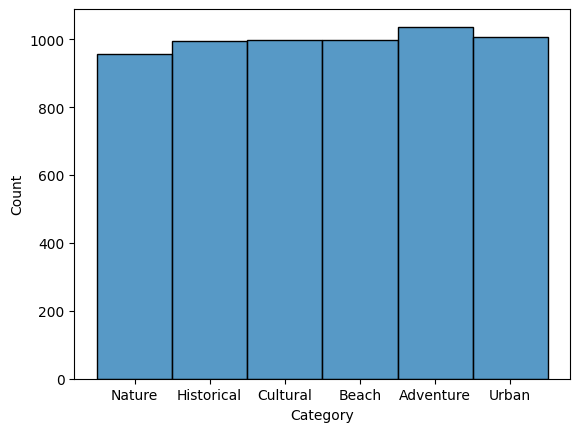

In [17]:
sns.histplot(data = df, x = 'Category', binwidth=1)

<Axes: xlabel='Accommodation_Available', ylabel='count'>

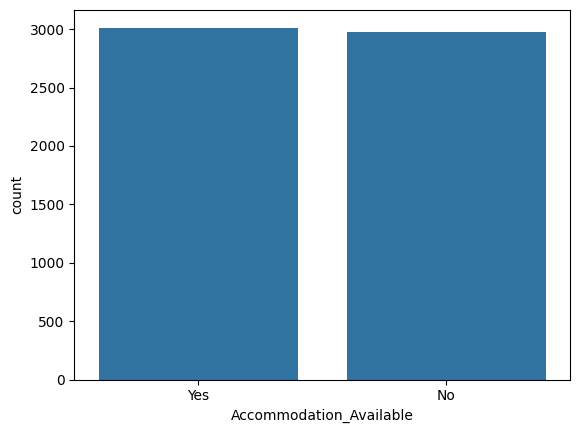

In [18]:
sns.countplot(x=df["Accommodation_Available"])

In [19]:
df.groupby(['Country'])['Accommodation_Available'].value_counts()

Country    Accommodation_Available
Australia  No                         425
           Yes                        405
Brazil     Yes                        438
           No                         402
China      No                         413
           Yes                        393
Egypt      No                         457
           Yes                        455
France     No                         431
           Yes                        426
India      Yes                        449
           No                         447
USA        Yes                        447
           No                         401
Name: count, dtype: int64

<Axes: xlabel='Visitors', ylabel='Density'>

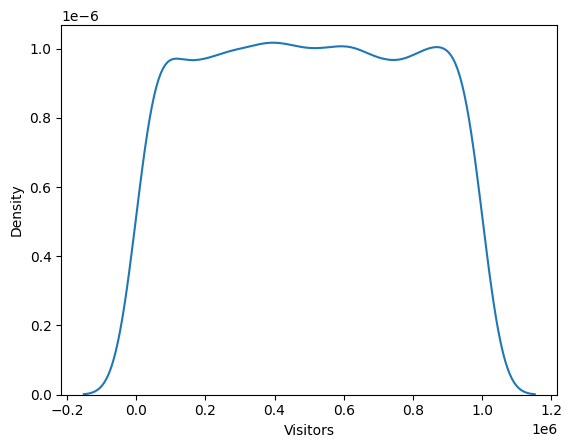

In [20]:
sns.kdeplot(x=df['Visitors'])

<Axes: xlabel='Rating', ylabel='Density'>

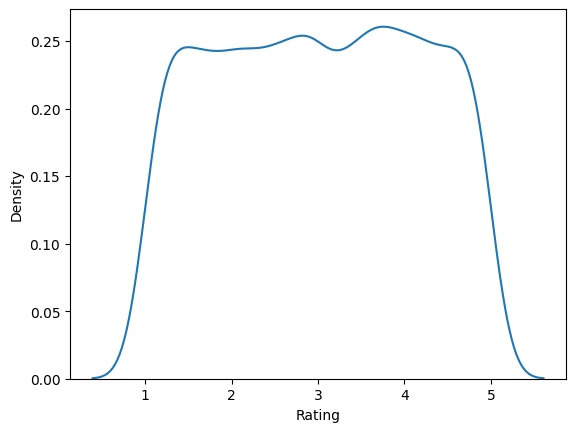

In [21]:
sns.kdeplot(x=df['Rating'])

<Axes: xlabel='Revenue', ylabel='Density'>

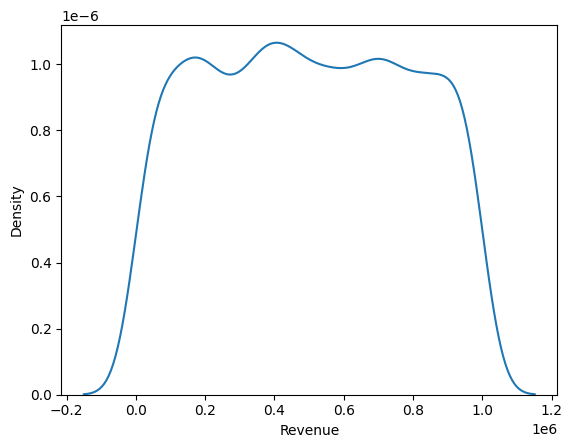

In [22]:
sns.kdeplot(x=df['Revenue'])

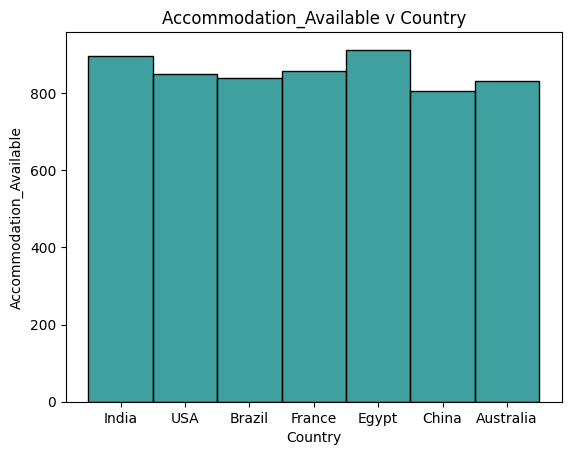

In [23]:
sns.histplot(df['Country'], color='teal')
plt.title('Accommodation_Available v Country')
plt.xlabel('Country')
plt.ylabel('Accommodation_Available')
plt.show()

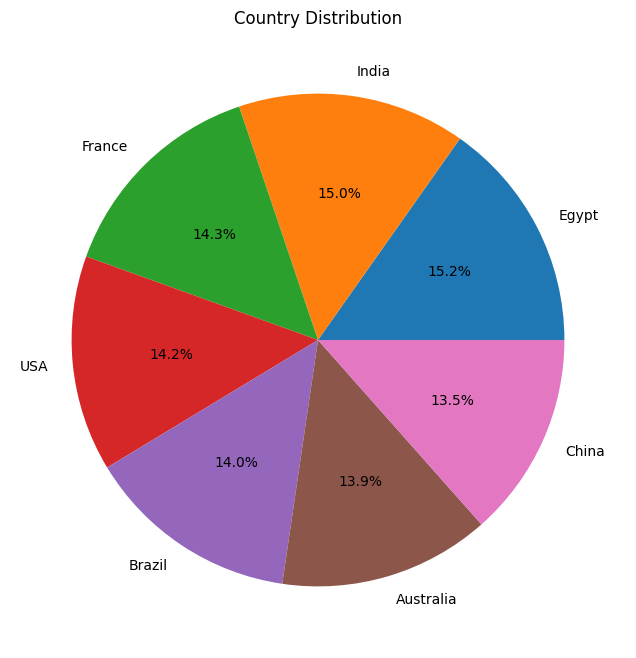

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(df['Country'].value_counts(), labels=df['Country'].value_counts().index, autopct='%1.1f%%')
plt.title('Country Distribution')
plt.show()

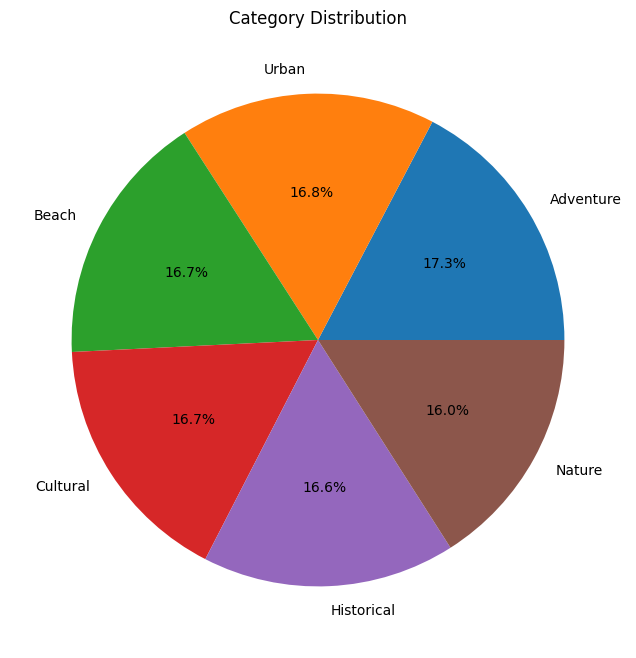

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

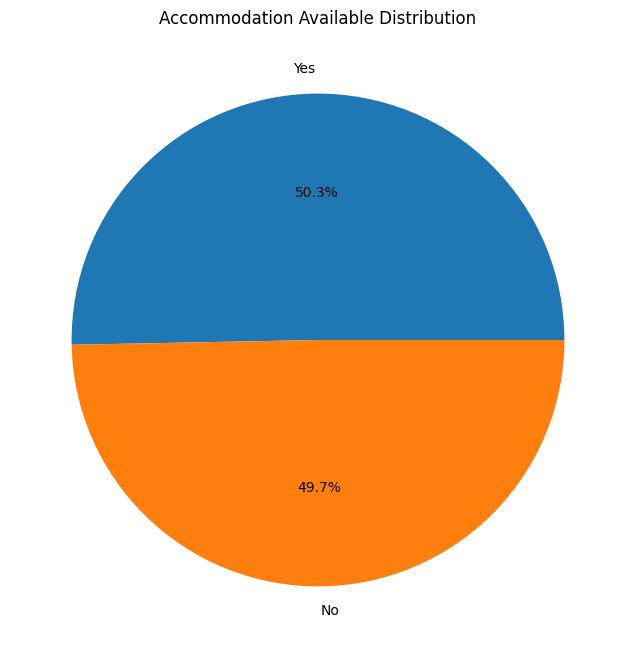

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(df['Accommodation_Available'].value_counts(), labels=df['Accommodation_Available'].value_counts().index, autopct='%1.1f%%')
plt.title('Accommodation Available Distribution')
plt.show()

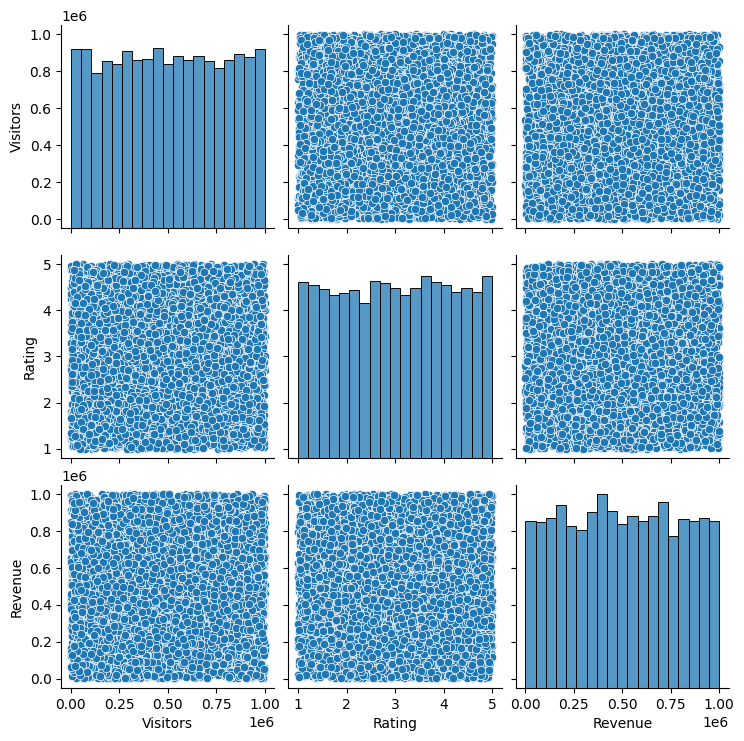

In [27]:
sns.pairplot(df)

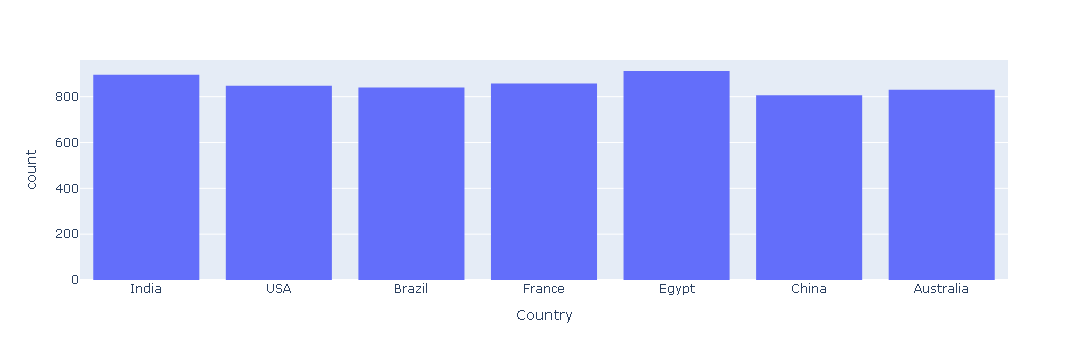

In [28]:
import plotly.express as plx
plx.histogram(df, x="Country")

In [29]:
df.corr(numeric_only=True)

Visitors    Rating   Revenue
Visitors  1.000000 -0.010337  0.008358
Rating   -0.010337  1.000000  0.000574
Revenue   0.008358  0.000574  1.000000

<Axes: >

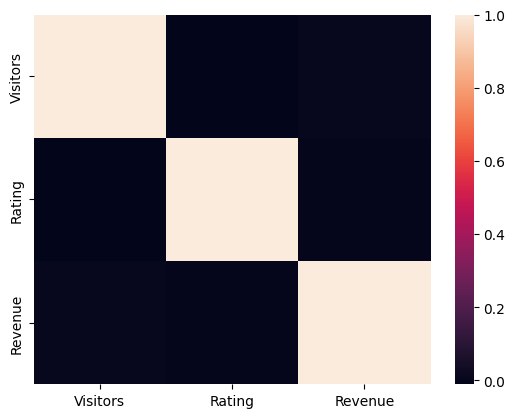

In [30]:
sns.heatmap(df.corr(numeric_only=True))

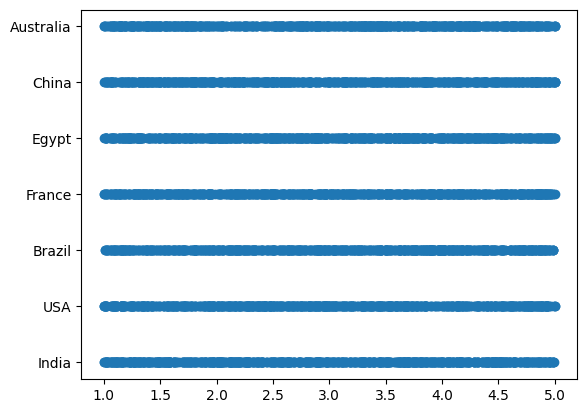

In [31]:
plt.scatter(df['Rating'],df['Country'])

In [32]:
pd.crosstab(df['Country'], df['Category'])

Category   Adventure  Beach  Cultural  Historical  Nature  Urban
Country                                                         
Australia        148    148       139         134     133    128
Brazil           160    136       140         148     116    140
China            139    135       136         135     133    128
Egypt            165    155       152         157     129    154
France           124    147       148         132     164    142
India            159    153       149         147     136    152
USA              142    124       134         141     145    162

In [33]:
pd.crosstab(df['Country'], df[ 'Visitors'])

Visitors   1108    1261    1382    1385    1441    1465    1855    1917    \
Country                                                                     
Australia       0       0       0       0       0       0       0       0   
Brazil          0       1       0       0       0       0       0       0   
China           0       0       0       1       0       1       0       1   
Egypt           1       0       0       0       0       0       0       0   
France          0       0       0       0       0       0       1       0   
India           0       0       1       0       0       0       0       0   
USA             0       0       0       0       1       0       0       0   

Visitors   1928    1942    ...  997922  998327  998356  998976  999197  \
Country                    ...                                           
Australia       0       0  ...       0       0       0       1       0   
Brazil          1       0  ...       0       1       0       0       0   
China           0       0  ...       0       0       0       0       0   
Egypt           0       0  ...       0       0       0       0       0   
France          0       0  ...       0       0       0       0       0   
India           0       0  ...       1       0       0       0       0   
USA             0       1  ...       0       0       1       0       1   

Visitors   999664  999750  999855  999891  999982  
Country                                            
Australia       1       1       0       0       0  
Brazil          0       0       0       0       0  
China           0       0       0       0       1  
Egypt           0       0       0       1       0  
France          0       0       1       0       0  
India           0       0       0       0       0  
USA             0       0       0       0       0  

[7 rows x 5969 columns]

In [34]:
pd.crosstab(df['Country'], df['Revenue'])

Revenue    1025.81    1103.02    1227.89    1374.83    1739.40    1897.79    \
Country                                                                       
Australia          0          0          0          0          0          0   
Brazil             0          0          0          0          0          0   
China              0          0          0          0          0          1   
Egypt              0          1          0          0          1          0   
France             1          0          0          0          0          0   
India              0          0          1          0          0          0   
USA                0          0          0          1          0          0   

Revenue    2002.51    2063.79    2098.46    2168.15    ...  998640.52  \
Country                                                ...              
Australia          0          0          0          0  ...          0   
Brazil             0          0          0          1  ...          1   
China              0          0          0          0  ...          0   
Egypt              0          1          1          0  ...          0   
France             0          0          0          0  ...          0   
India              1          0          0          0  ...          0   
USA                0          0          0          0  ...          0   

Revenue    998808.14  999186.64  999200.95  999221.19  999410.89  999514.08  \
Country                                                                       
Australia          0          0          1          0          0          0   
Brazil             0          0          0          0          0          1   
China              0          1          0          1          1          0   
Egypt              0          0          0          0          0          0   
France             1          0          0          0          0          0   
India              0          0          0          0          0          0   
USA                0          0          0          0          0          0   

Revenue    999606.34  999821.20  999999.49  
Country                                     
Australia          0          0          0  
Brazil             0          0          0  
China              0          0          0  
Egypt              0          0          0  
France             0          0          1  
India              1          1          0  
USA                0          0          0  

[7 rows x 5989 columns]

<Axes: xlabel='Country', ylabel='Rating'>

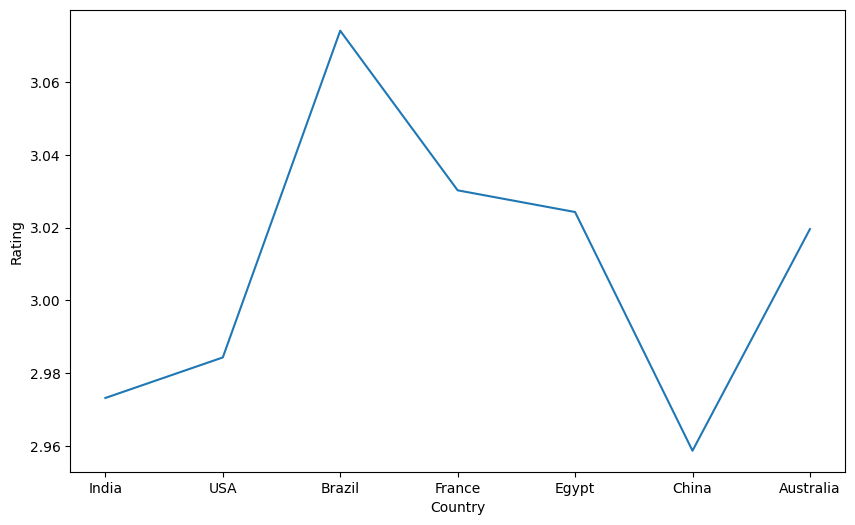

In [35]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Country', y = 'Rating', ci = None)

<Axes: xlabel='Country', ylabel='Revenue'>

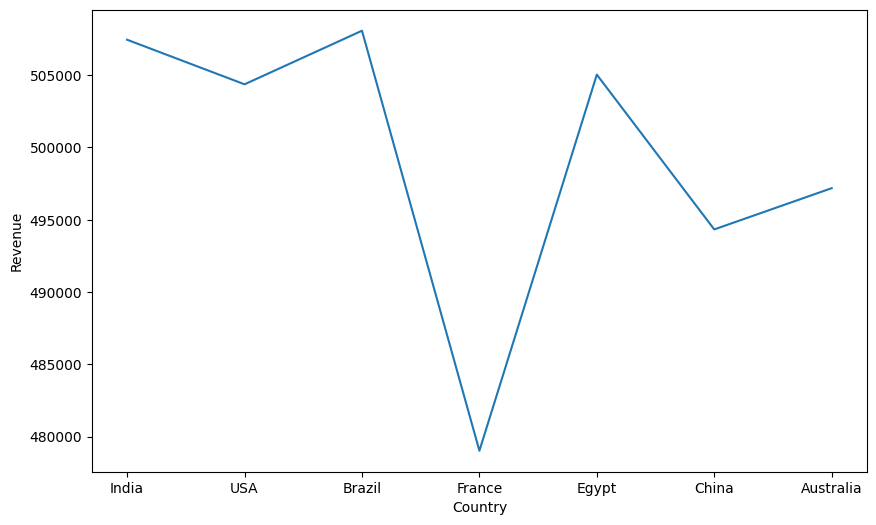

In [36]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Country', y = 'Revenue', ci = None)

In [37]:
df.columns

Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Label Encoding categorical columns
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Category'] = le.fit_transform(df['Category'])
df['Accommodation_Available'] = df['Accommodation_Available'].apply(lambda x: 1 if x == 'Yes' else 0)

# Defining features (X) and target variable (y)
X = df.drop(columns=['Revenue', 'Location'])
y = df['Revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Model evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R²: {r2_train}, Test R²: {r2_test}")


Train MSE: 82784903467.74643, Test MSE: 79941950728.63461
Train R²: 0.00016023596255521078, Test R²: -0.003040929220179178


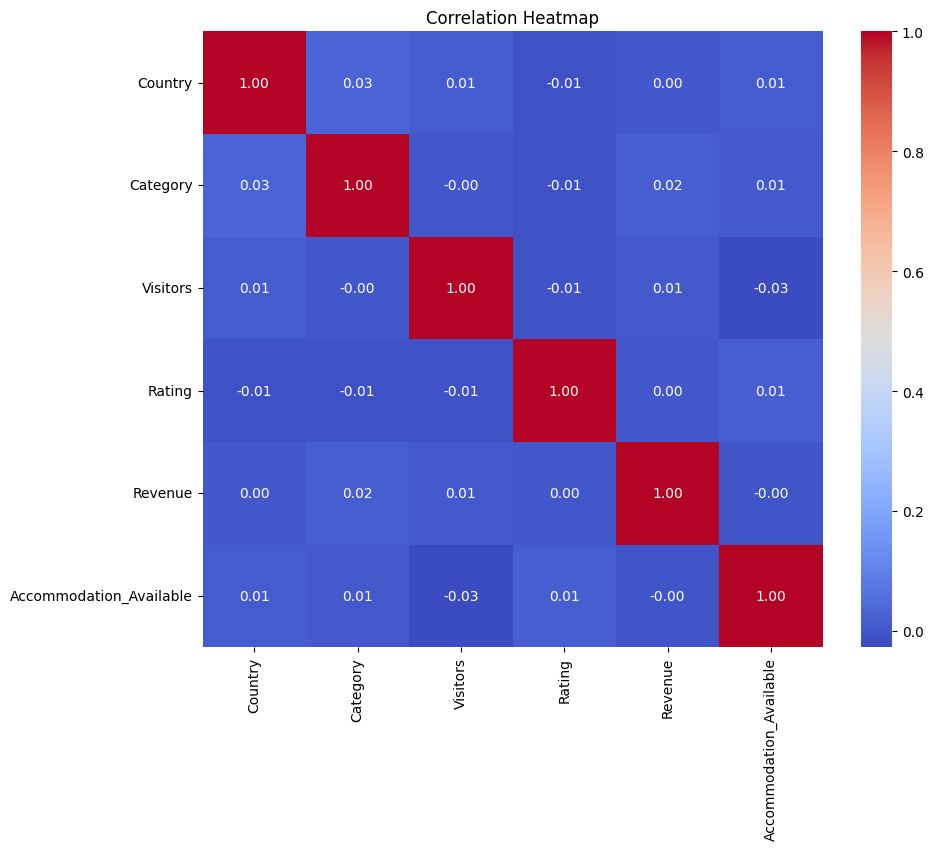

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


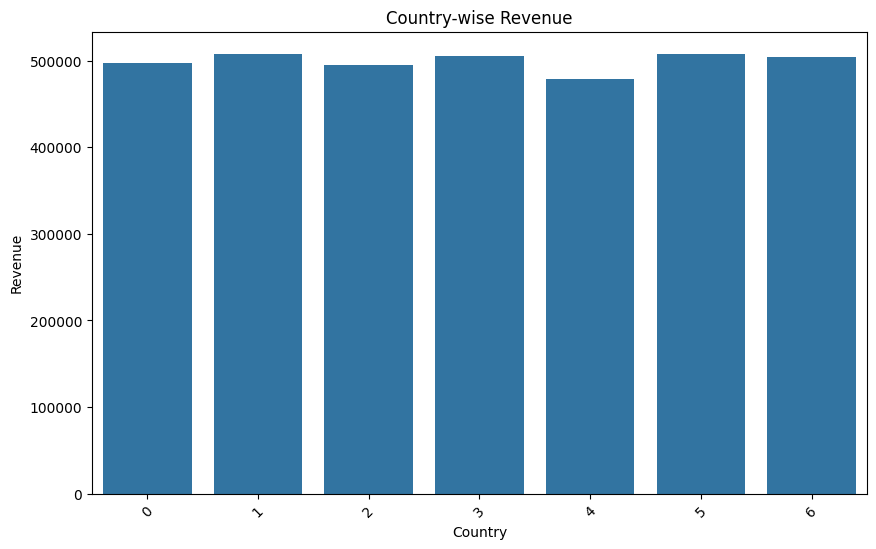

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Country", y="Revenue", data=df, ci=None)
plt.title('Country-wise Revenue')
plt.xticks(rotation=45)
plt.show()


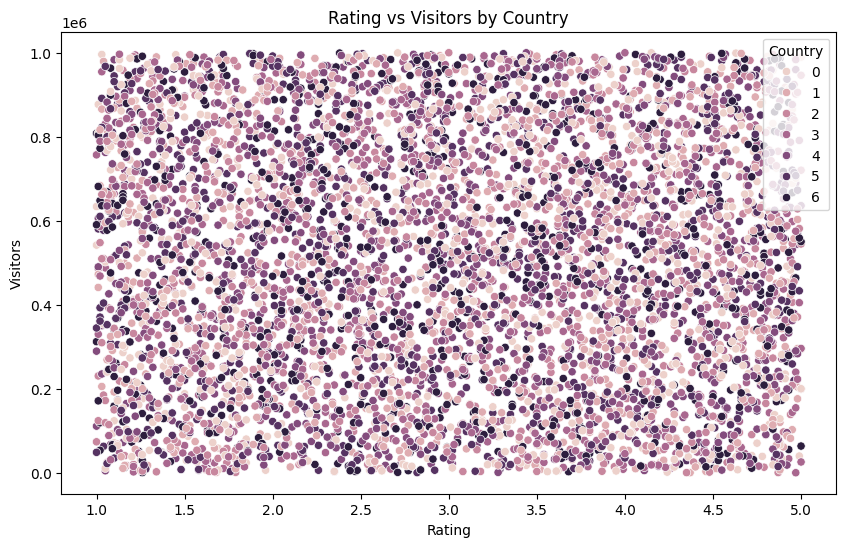

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating", y="Visitors", hue="Country", data=df)
plt.title("Rating vs Visitors by Country")
plt.show()


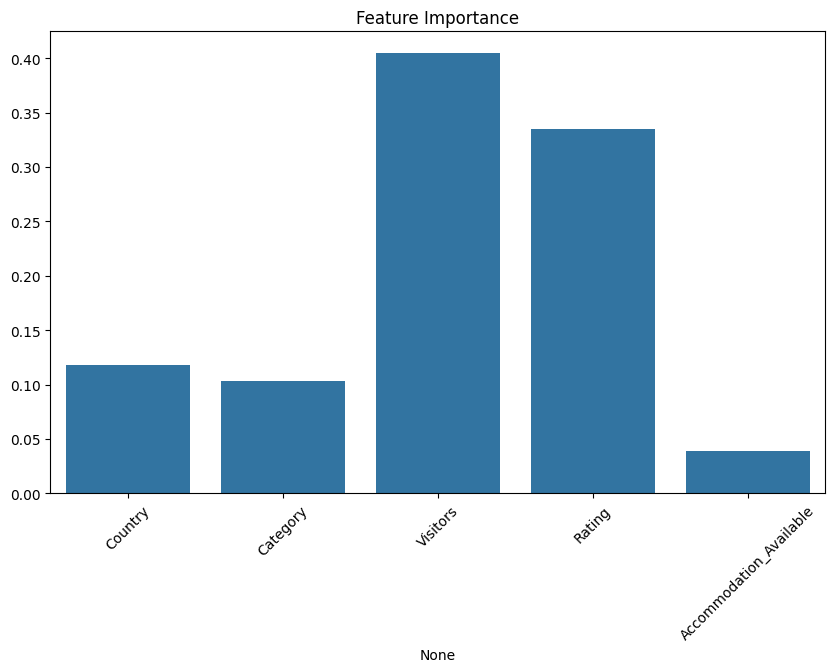

In [43]:
from sklearn.ensemble import RandomForestRegressor
importances = RandomForestRegressor().fit(X_train_scaled, y_train).feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

# Evaluate
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")


Decision Tree MSE: 165150509487.62308
Random Forest MSE: 88558330587.9951


In [45]:
# Predicting the number of visitors
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Features: Using all but the target 'Visitors'
X_visitors = df.drop(columns=['Visitors', 'Location'])
y_visitors = df['Visitors']

# Train-test split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visitors, y_visitors, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_visitor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_visitor.fit(X_train_vis, y_train_vis)

# Predict and evaluate
y_pred_vis_train = rf_visitor.predict(X_train_vis)
y_pred_vis_test = rf_visitor.predict(X_test_vis)

# Error metrics
mae_train_vis = mean_absolute_error(y_train_vis, y_pred_vis_train)
mae_test_vis = mean_absolute_error(y_test_vis, y_pred_vis_test)

print(f"Train MAE (Visitors): {mae_train_vis}, Test MAE (Visitors): {mae_test_vis}")


Train MAE (Visitors): 95953.98718639114, Test MAE (Visitors): 257632.8202420701


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Features: Using 'Rating' and other features, excluding 'Revenue'
X_revenue = df[['Rating', 'Country', 'Category', 'Accommodation_Available']]
y_revenue = df['Revenue']

# Train-test split
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_revenue, y_revenue, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_rev, y_train_rev)

# Predict and evaluate
y_pred_rev_train = gbr.predict(X_train_rev)
y_pred_rev_test = gbr.predict(X_test_rev)

mse_train_rev = mean_squared_error(y_train_rev, y_pred_rev_train)
mse_test_rev = mean_squared_error(y_test_rev, y_pred_rev_test)

print(f"Train MSE (Revenue): {mse_train_rev}, Test MSE (Revenue): {mse_test_rev}")


Train MSE (Revenue): 77859872401.54135, Test MSE (Revenue): 81576922788.13475


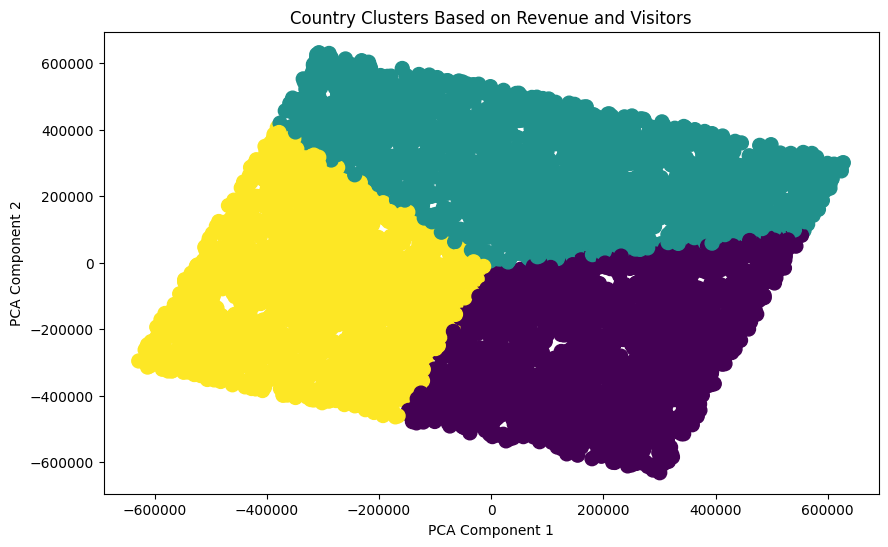

In [47]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Features: Country, Revenue, Visitors
X_cluster = df[['Country', 'Revenue', 'Visitors']]

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualizing Clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title("Country Clusters Based on Revenue and Visitors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Binarize Visitors (High/Low)
df['High_Visitors'] = df['Visitors'].apply(lambda x: 1 if x > df['Visitors'].median() else 0)

# Features: Accommodation_Available and other predictors
X_acc = df[['Accommodation_Available', 'Rating', 'Country', 'Category']]
y_acc = df['High_Visitors']

# Train-test split
X_train_acc, X_test_acc, y_train_acc, y_test_acc = train_test_split(X_acc, y_acc, test_size=0.2, random_state=42)

# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_acc, y_train_acc)

# Predict and evaluate
y_pred_acc = lr.predict(X_test_acc)
accuracy_acc = accuracy_score(y_test_acc, y_pred_acc)

print(f"Accuracy (Accommodation Impact on Visitors): {accuracy_acc}")


Accuracy (Accommodation Impact on Visitors): 0.4791318864774624


In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# Features for recommendation: 'Category', 'Rating', 'Accommodation_Available'
recommendation_data = df[['Category', 'Rating', 'Accommodation_Available']]

# Compute cosine similarity
similarity_matrix = cosine_similarity(recommendation_data)

# Function to get recommendations
def get_recommendations(index, similarity_matrix, top_n=5):
    similar_scores = list(enumerate(similarity_matrix[index]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:top_n+1]
    
    recommendations = [df.iloc[i[0]]['Location'] for i in similar_scores]
    return recommendations

# Example: Recommend destinations similar to location at index 10
index = 10
print(f"Recommendations for {df.iloc[index]['Location']}:")
print(get_recommendations(index, similarity_matrix))


Recommendations for dUCLjskBYA:
['QGeWMFJYzR', 'vcGMlcZrZc', 'omWJnqjXYO', 'vhiYcTCjlN', 'aKTzilgNpO']


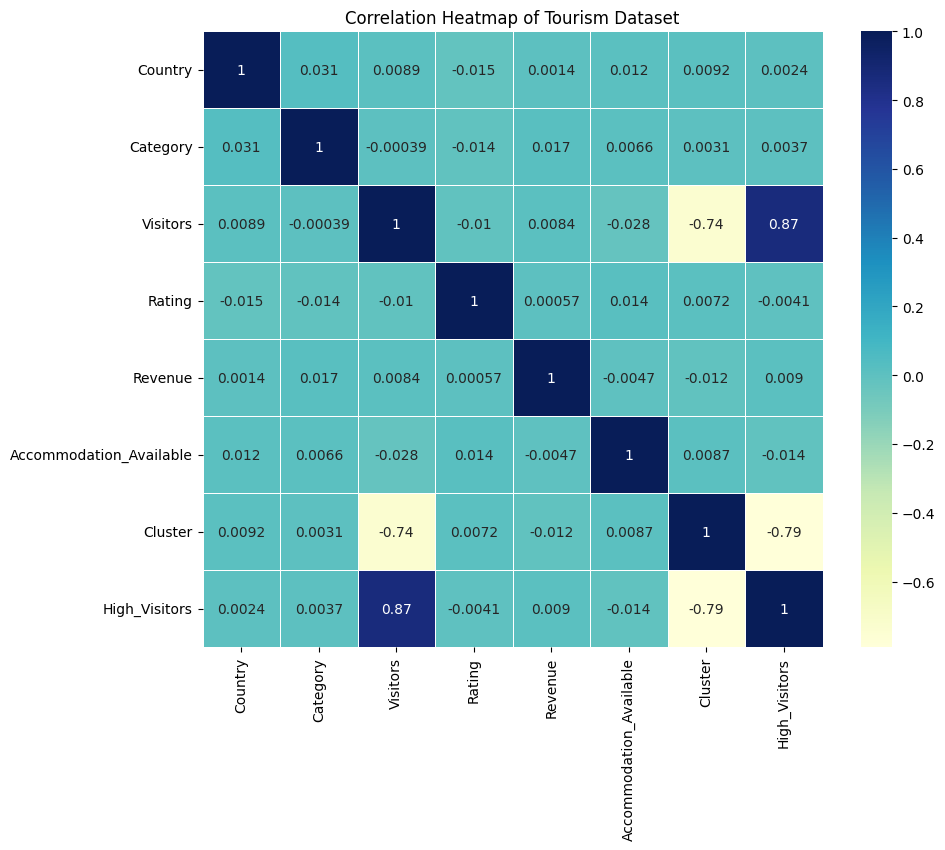

In [54]:
# Enhanced correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the pairwise correlation of all columns
corr = df.corr(numeric_only=True)

# Plot heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Tourism Dataset")
plt.show()


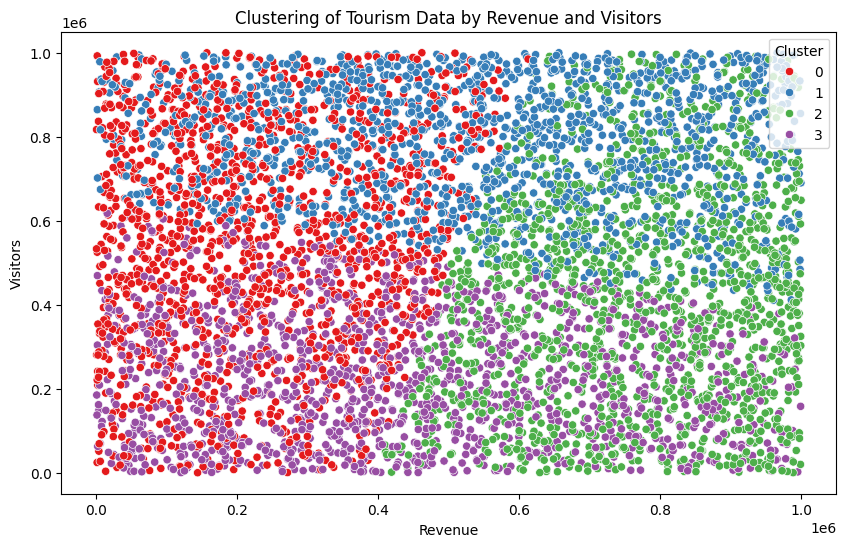

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data for clustering
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Visitors', 'Revenue', 'Rating']])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Visitors', hue='Cluster', data=df, palette='Set1')
plt.title("Clustering of Tourism Data by Revenue and Visitors")
plt.show()


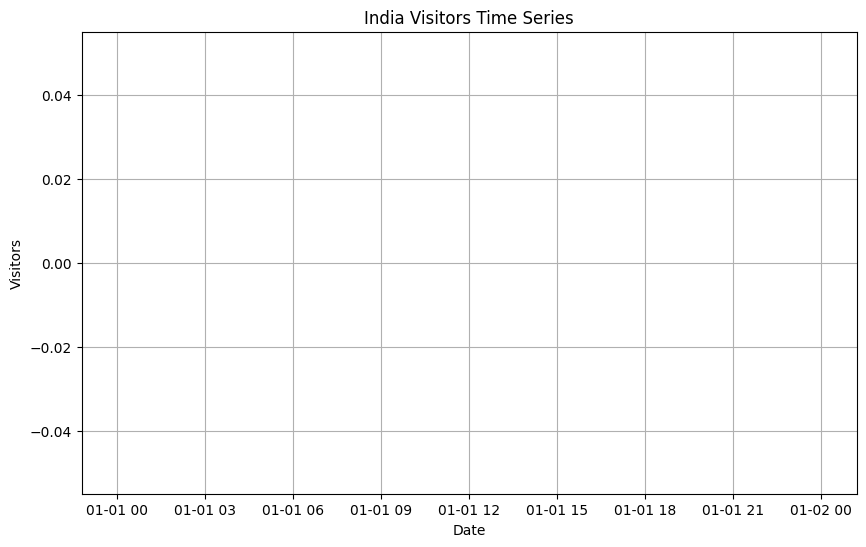

In [56]:
# Simulate a time series dataset from visitors data (assuming some dates)
df['Date'] = pd.date_range(start='1/1/2018', periods=len(df), freq='D')

# Plot time series for a specific country
plt.figure(figsize=(10, 6))
india_visitors = df[df['Country'] == 'India']
plt.plot(india_visitors['Date'], india_visitors['Visitors'])
plt.title('India Visitors Time Series')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.grid(True)
plt.show()


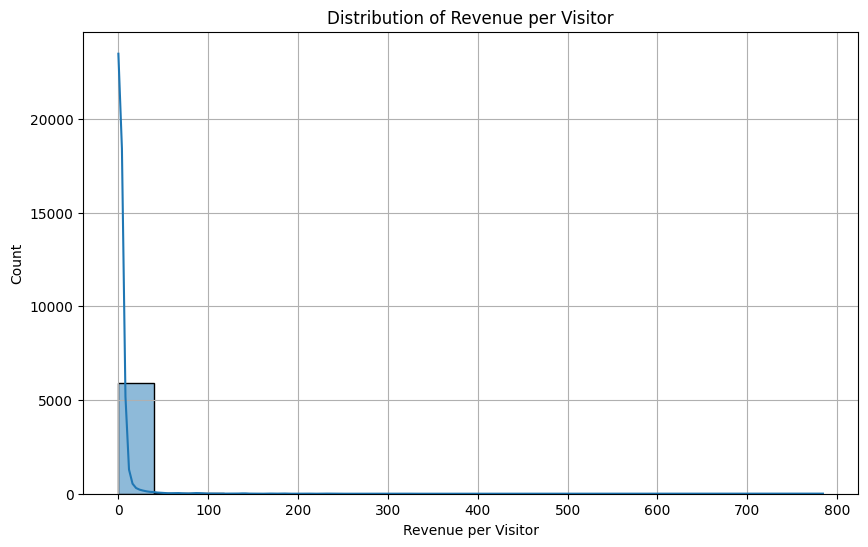

In [57]:
# Calculate revenue per visitor
df['Revenue_per_Visitor'] = df['Revenue'] / df['Visitors']

# Visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue_per_Visitor'], bins=20, kde=True)
plt.title('Distribution of Revenue per Visitor')
plt.xlabel('Revenue per Visitor')
plt.ylabel('Count')
plt.grid(True)
plt.show()


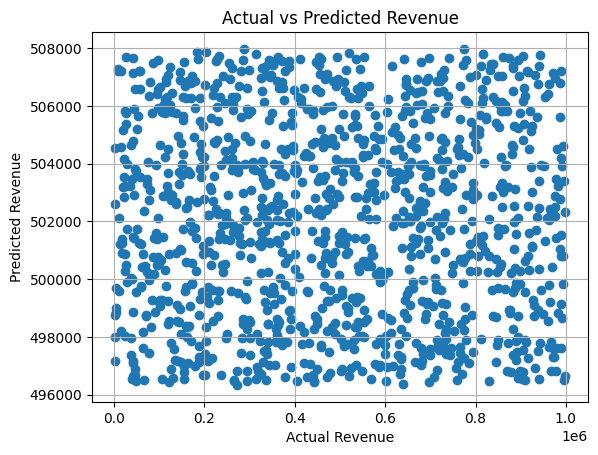

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparing data
X = df[['Visitors', 'Rating']]
y = df['Revenue']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True)
plt.show()


In [60]:
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 7.9 MB/s eta 0:00:00


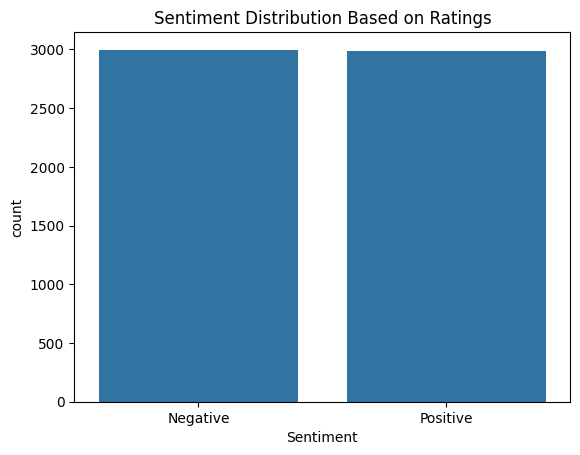

In [61]:
from textblob import TextBlob

# Example of sentiment analysis on ratings if reviews were available
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Count plot of sentiment
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution Based on Ratings')
plt.show()


<Figure size 1200x800 with 0 Axes>

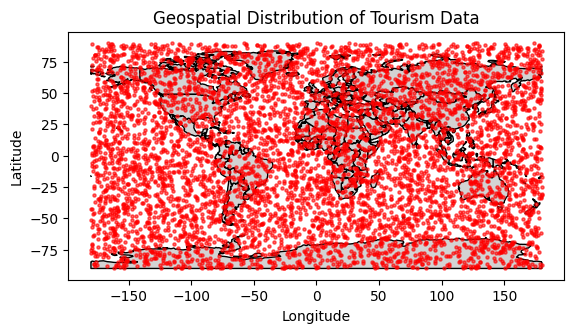

In [66]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with the countries and some dummy coordinates
# Replace with actual coordinates if available
df['geometry'] = df.apply(lambda row: Point(np.random.uniform(-180, 180), np.random.uniform(-90, 90)), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Load world map
world = gpd.read_file('ne_110m_admin_0_countries.shp')  # Update with your shapefile path

# Plot
plt.figure(figsize=(12, 8))
ax = world.plot(edgecolor='k', color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=5, alpha=0.6)
plt.title('Geospatial Distribution of Tourism Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


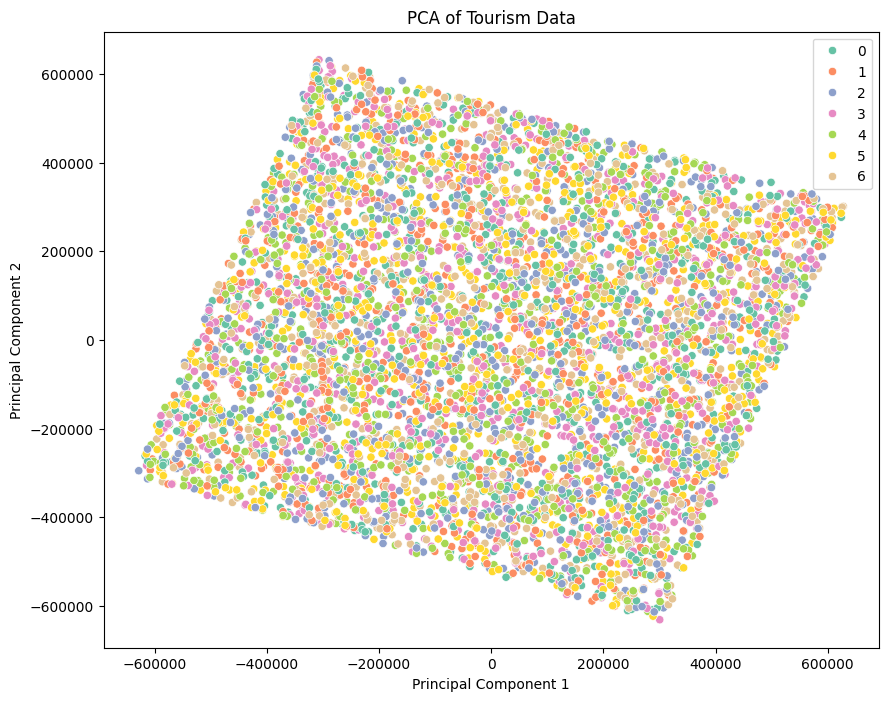

In [67]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['Visitors', 'Rating', 'Revenue']])
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Country'] = df['Country']

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Country', data=pca_df, palette='Set2')
plt.title('PCA of Tourism Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


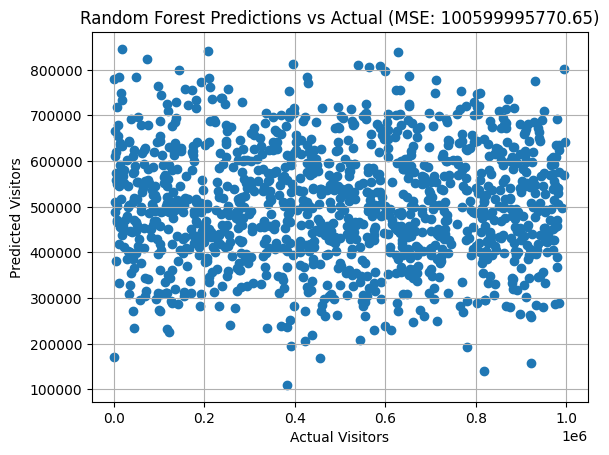

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target
X = df[['Rating', 'Revenue']]
y = df['Visitors']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.title(f'Random Forest Predictions vs Actual (MSE: {mse:.2f})')
plt.xlabel('Actual Visitors')
plt.ylabel('Predicted Visitors')
plt.grid(True)
plt.show()


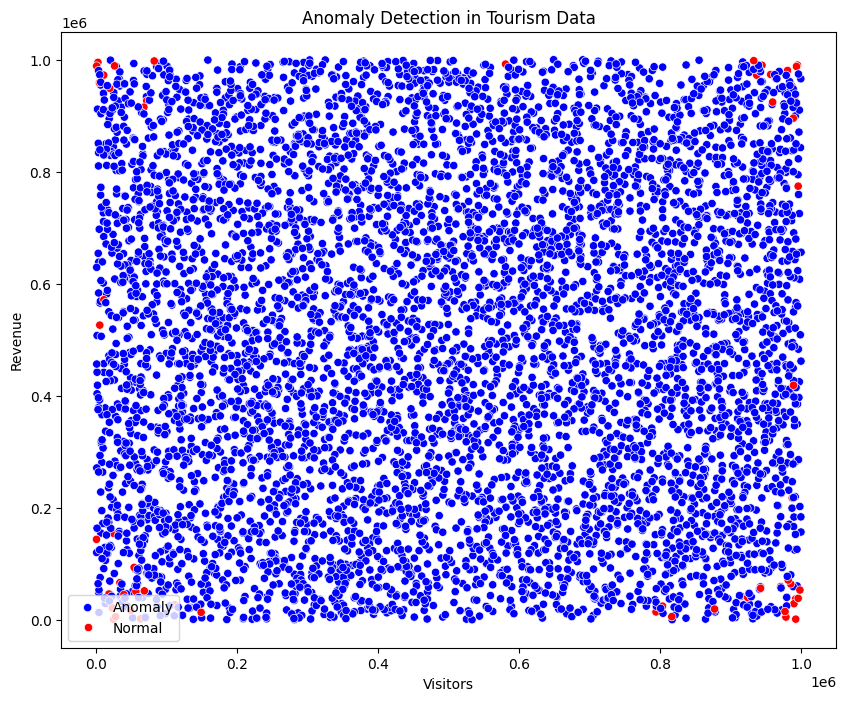

In [69]:
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df[['Visitors', 'Rating', 'Revenue']])

# Plot anomalies
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Visitors', y='Revenue', hue='Anomaly', palette={-1: 'red', 1: 'blue'}, data=df)
plt.title('Anomaly Detection in Tourism Data')
plt.xlabel('Visitors')
plt.ylabel('Revenue')
plt.legend(['Anomaly', 'Normal'])
plt.show()


In [71]:
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.6 MB/s eta 0:00:00


In [75]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 7.3 MB/s eta 0:00:00


In [78]:
df.isna().sum()


Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
Cluster                    0
High_Visitors              0
Date                       0
Revenue_per_Visitor        0
Sentiment                  0
geometry                   0
Anomaly                    0
dtype: int64

In [79]:
df.describe()


Country     Category       Visitors       Rating        Revenue  \
count  5989.000000  5989.000000    5989.000000  5989.000000    5989.000000   
mean      3.036233     2.476206  501016.089497     3.009347  499479.367253   
min       0.000000     0.000000    1108.000000     1.000000    1025.810000   
25%       1.000000     1.000000  252789.000000     2.010000  251410.450000   
50%       3.000000     2.000000  500831.000000     3.000000  494169.350000   
75%       5.000000     4.000000  751371.000000     4.010000  742241.240000   
max       6.000000     5.000000  999982.000000     5.000000  999999.490000   
std       1.989499     1.717326  289783.294978     1.155980  286743.225211   

       Accommodation_Available      Cluster  High_Visitors  \
count              5989.000000  5989.000000    5989.000000   
mean                  0.503089     1.492570       0.499917   
min                   0.000000     0.000000       0.000000   
25%                   0.000000     1.000000       0.000000   
50%                   1.000000     1.000000       0.000000   
75%                   1.000000     2.000000       1.000000   
max                   1.000000     3.000000       1.000000   
std                   0.500032     1.107824       0.500042   

                      Date  Revenue_per_Visitor      Anomaly  
count                 5989          5989.000000  5989.000000  
mean   2026-03-14 00:00:00             3.624295     0.979963  
min    2018-01-01 00:00:00             0.001350    -1.000000  
25%    2022-02-06 00:00:00             0.502985     1.000000  
50%    2026-03-14 00:00:00             1.005356     1.000000  
75%    2030-04-19 00:00:00             2.000396     1.000000  
max    2034-05-25 00:00:00           784.127343     1.000000  
std                    NaN            18.763034     0.199195

In [80]:
df['Country'].value_counts()


Country
3    912
5    896
4    857
6    848
1    840
0    830
2    806
Name: count, dtype: int64

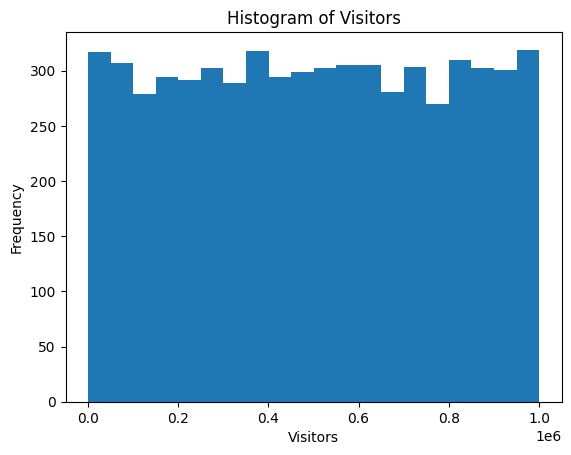

In [81]:
import matplotlib.pyplot as plt

plt.hist(df['Visitors'], bins=20)
plt.xlabel('Visitors')
plt.ylabel('Frequency')
plt.title('Histogram of Visitors')
plt.show()


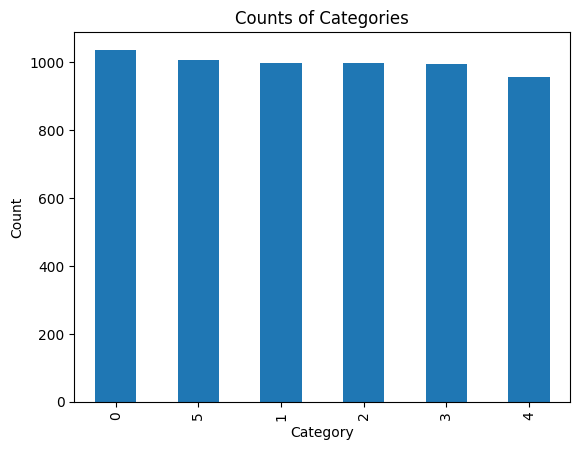

In [82]:
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Categories')
plt.show()


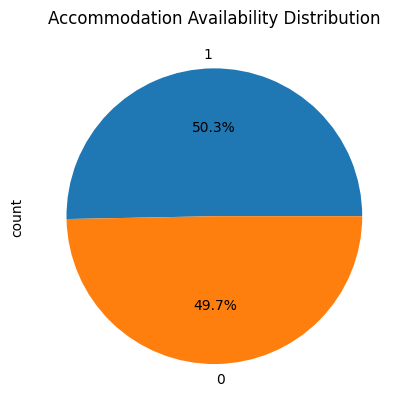

In [83]:
df['Accommodation_Available'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Accommodation Availability Distribution')
plt.show()


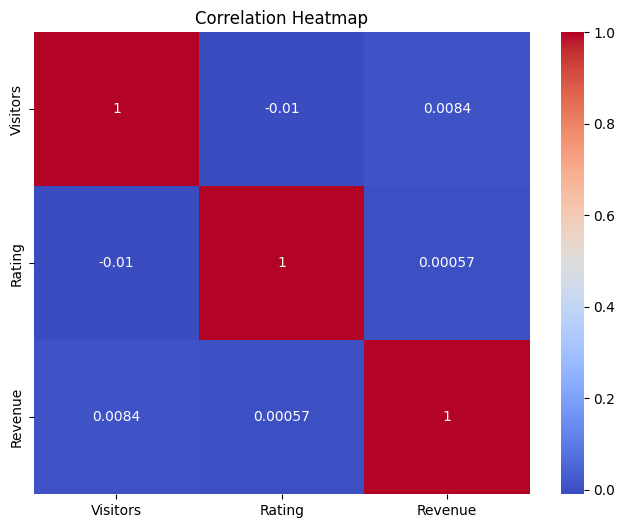

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Visitors', 'Rating', 'Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
